# (Homework) Week 7 - DataScience Bootcamp Fall 2025

All solution cells are replaced with `# TODO` placeholders so you can fill them in.

**Name:Xintong Gu**  \
**Email:xg2440@nyu.edu**

---

## Problem A: Bayesian Dice Game (Posterior Inference)

You are playing a dice game at a carnival. The operator has **three dice**, each with different biases for rolling a six:

| Die | P(6) | P(1–5) |
|-----|------|--------|
| A   | 0.10 | 0.90   |
| B   | 0.30 | 0.70   |
| C   | 0.60 | 0.40   |

Before each round, the operator secretly picks one die at random (each equally likely). He then rolls it **10 times** and tells you how many sixes appeared.

Your job is to infer which die was used using **Bayes’ Theorem**:

$$ P(Die|k) = \frac{P(k|Die)P(Die)}{\sum_{d} P(k|d)P(d)} $$

where $P(k|Die)$ follows a Binomial (n=10, p_i) distribution.

**Tasks:**
1. Simulate the experiment by picking a random die and rolling it 10 times.
2. Compute posterior probabilities for each die given observed sixes.
3. Plot likelihoods and posterior probabilities.
4. Evaluate inference accuracy over 100 rounds.

--- Example Run ---
Observed 6 sixes out of 10 rolls
P(A | 6 sixes) = 0.000
P(B | 6 sixes) = 0.128
P(C | 6 sixes) = 0.872
True die: C
--- End Example Run ---


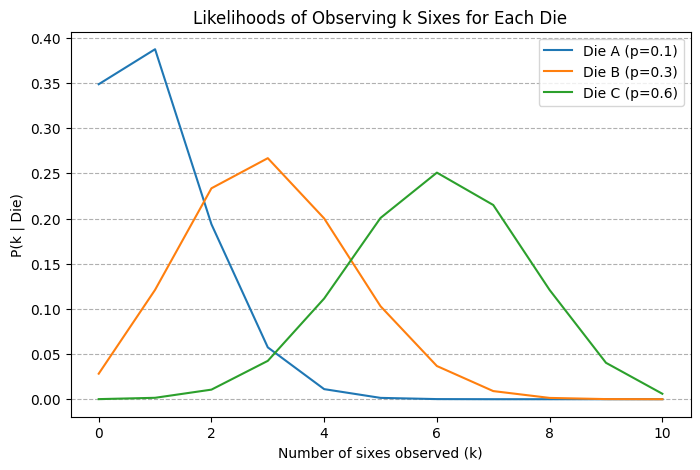


--- Accuracy Evaluation ---
Accuracy over 100 rounds: 0.74
--- End Accuracy Evaluation ---


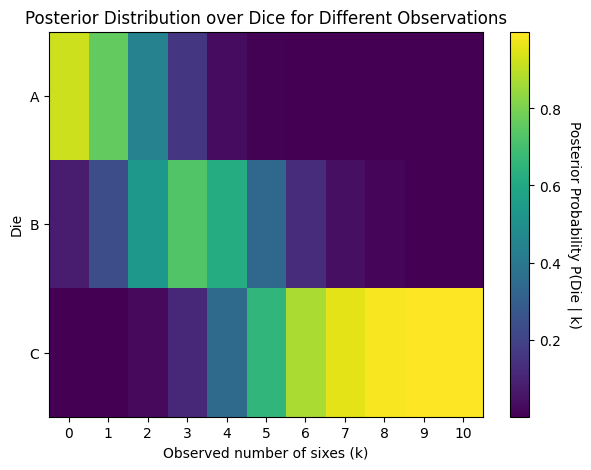

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Dice setup
dice_probs = {'A': 0.1, 'B': 0.3, 'C': 0.6}
dice_names = list(dice_probs.keys())
# The operator secretly picks one die at random (each equally likely).
prior = {die: 1/len(dice_names) for die in dice_names}
n_rolls = 10

# Compute binomial probability mass function
def binomial_prob(n, k, p):
    # P(k | Die) is the likelihood: C(n, k) * p^k * (1-p)^(n-k)
    if k < 0 or k > n:
        return 0
    # math.comb(n, k) is the binomial coefficient (n choose k)
    return math.comb(n, k) * (p**k) * ((1-p)**(n-k))

def simulate_round():
    # 1. Pick a random die (each equally likely)
    true_die = np.random.choice(dice_names, p=list(prior.values()))
    p = dice_probs[true_die]

    # 2. Roll it 10 times and count the number of sixes (k)
    # k follows a Binomial(n=10, p) distribution
    k = np.random.binomial(n_rolls, p)
    return true_die, k

def posterior_given_k(k):
    # P(Die | k) = P(k | Die) * P(Die) / Sum_d [ P(k | d) * P(d) ]

    likelihoods = {}
    for die in dice_names:
        p_die = dice_probs[die]
        # P(k | Die) - Binomial Likelihood
        likelihoods[die] = binomial_prob(n_rolls, k, p_die)

    # P(k | Die) * P(Die) - Numerator and Unnormalized Posterior
    unnormalized_posterior = {die: likelihoods[die] * prior[die] for die in dice_names}

    # Sum_d [ P(k | d) * P(d) ] - Evidence (Normalizing Constant)
    evidence = sum(unnormalized_posterior.values())

    # P(Die | k) - Normalized Posterior
    if evidence == 0:
        # Avoid division by zero if k is extremely unlikely for all dice
        return [1/len(dice_names)] * len(dice_names)

    posterior = [unnormalized_posterior[die] / evidence for die in dice_names]
    return posterior

# Example run
true_die, k = simulate_round()
posterior = posterior_given_k(k)

print(f"--- Example Run ---")
print(f"Observed {k} sixes out of {n_rolls} rolls")
for die, p in zip(dice_names, posterior):
    print(f"P({die} | {k} sixes) = {p:.3f}")
print(f"True die: {true_die}")
print(f"--- End Example Run ---")

# Likelihood plot
ks = np.arange(0, 11)
plt.figure(figsize=(8,5))
for die, p in dice_probs.items():
    plt.plot(ks, [binomial_prob(n_rolls, k, p) for k in ks], label=f"Die {die} (p={p})")
plt.xlabel('Number of sixes observed (k)')
plt.ylabel('P(k | Die)')
plt.legend()
plt.title('Likelihoods of Observing k Sixes for Each Die')
plt.grid(axis='y', linestyle='--')
plt.show()

# Accuracy evaluation
num_trials = 100
correct = 0
for _ in range(num_trials):
    true_die, k = simulate_round()
    posterior = posterior_given_k(k)
    # The predicted die is the one with the maximum posterior probability
    predicted_die = dice_names[np.argmax(posterior)]
    correct += (predicted_die == true_die)

print(f"\n--- Accuracy Evaluation ---")
print(f"Accuracy over {num_trials} rounds: {correct/num_trials:.2f}")
print(f"--- End Accuracy Evaluation ---")

# Posterior visualizations
posterior_matrix = np.array([posterior_given_k(k) for k in ks])
plt.figure(figsize=(7,5))
plt.imshow(posterior_matrix.T, cmap='viridis', aspect='auto')
plt.xticks(ks)
plt.yticks(range(3), dice_names)
plt.xlabel('Observed number of sixes (k)')
plt.ylabel('Die')
cbar = plt.colorbar(label='Posterior Probability P(Die | k)')
cbar.set_label('Posterior Probability P(Die | k)', rotation=270, labelpad=15)
plt.title('Posterior Distribution over Dice for Different Observations')
plt.show()

## Problem B: Linear Regression
Given x=[-2,-1,0,1,2] and y=[7,4,3,4,7]. Fit a linear model using the normal equation.

In [4]:
import numpy as np

# Given data
x = np.array([-2, -1, 0, 1, 2])
y = np.array([7, 4, 3, 4, 7])

# Construct the design matrix X
# X has two columns: a column of ones (for the intercept theta_0)
# and the feature x (for the slope theta_1).
X = np.c_[np.ones(len(x)), x]

# Calculate the optimal theta using the Normal Equation
# theta = inv(X.T @ X) @ X.T @ y
XTX_inv = np.linalg.inv(X.T @ X)
XTY = X.T @ y
theta = XTX_inv @ XTY # The result is [theta_0, theta_1]

# Calculate the predictions
y_pred = X @ theta

# Calculate the Mean Squared Error (MSE)
m = len(y)
mse_linear = np.sum((y_pred - y)**2) / m

print('Linear theta:', theta, 'MSE:', mse_linear)

Linear theta: [5. 0.] MSE: 2.8


## Problem C: Gradient Descent
Minimize f(w)=5(w−11)^4. Perform steps with α=1/400 and α=1/4000000. (Print the first 5 steps and visualize)

## 📊 Gradient Descent Results (w0=13)
---
### 🚀 Case 1: Large Alpha (α = 0.0025)
Step w_k            f(w_k)         
-----------------------------------
0    13.00000000    80.00000000    
1    12.60000000    32.76800000    
2    12.39520000    18.94592766    
3    12.25940637    12.57863580    
4    12.15952887    9.03849801     

---
### 🐌 Case 2: Small Alpha (α = 2.5e-07)
Step w_k            f(w_k)         
-----------------------------------
0    13.00000000    80.00000000    
1    12.99996000    79.99360019    
2    12.99992000    79.98720115    
3    12.99988001    79.98080288    
4    12.99984001    79.97440538    


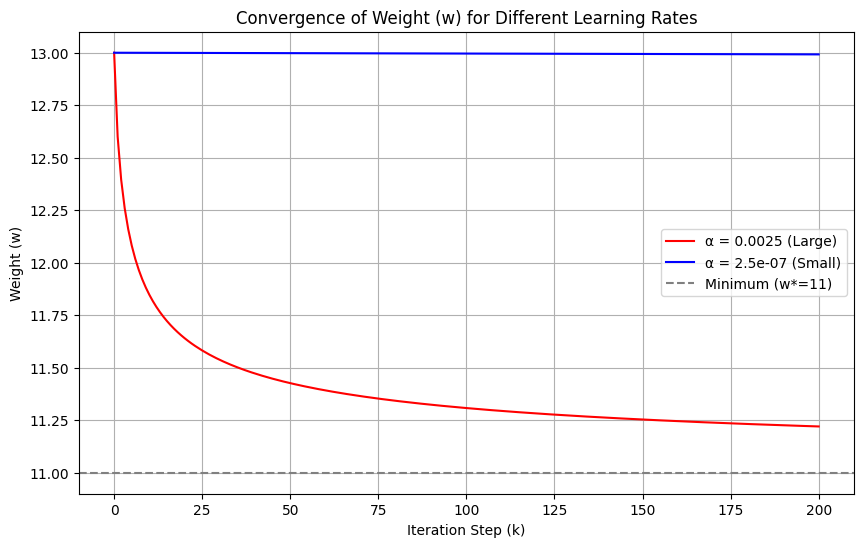

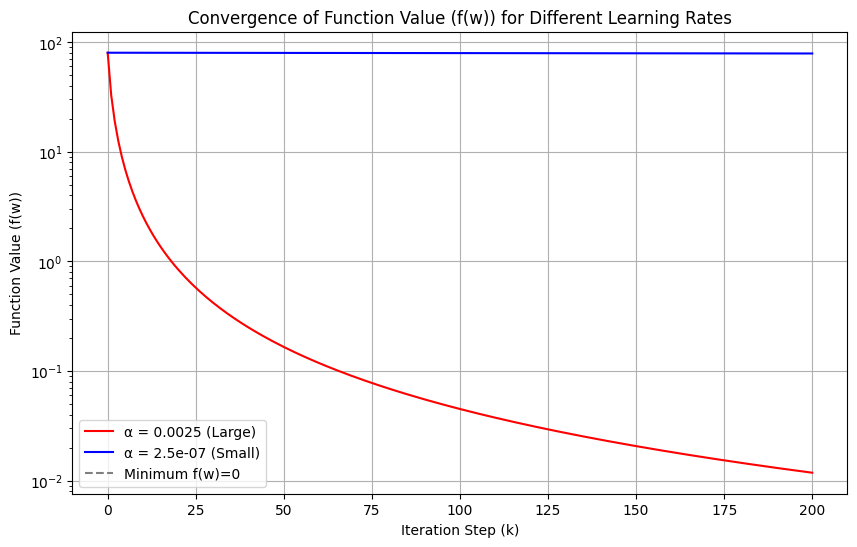

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Gradient Descent Function
def grad_descent_vals(w0, alpha, steps):
    """Performs Gradient Descent for f(w) = 5(w-11)^4."""

    # Gradient (Derivative) function
    def gradient(w):
        return 20 * (w - 11)**3

    history = {'w': [w0], 'f_w': [5 * (w0 - 11)**4]}
    w = w0

    for _ in range(steps):
        # Gradient Descent Update Rule
        grad_w = gradient(w)
        w_new = w - alpha * grad_w

        # Store new values
        w = w_new
        history['w'].append(w)
        history['f_w'].append(5 * (w - 11)**4)

    return history

# --- Run for two learning rates ---
w0 = 13
steps = 200

# Learning Rate 1: alpha_1 = 1/400 = 0.0025 (Large)
alpha_1 = 1/400
hist_1 = grad_descent_vals(w0, alpha_1, steps)

# Learning Rate 2: alpha_2 = 1/4000000 = 0.00000025 (Small)
alpha_2 = 1/4000000
hist_2 = grad_descent_vals(w0, alpha_2, steps)

# --- Print First 5 Steps ---
print(f"## 📊 Gradient Descent Results (w0={w0})")
print("---")
print(f"### 🚀 Case 1: Large Alpha (α = {alpha_1})")
print(f"{'Step':<5}{'w_k':<15}{'f(w_k)':<15}")
print('-' * 35)
for i in range(5):
    print(f"{i:<5}{hist_1['w'][i]:<15.8f}{hist_1['f_w'][i]:<15.8f}")

print("\n---")
print(f"### 🐌 Case 2: Small Alpha (α = {alpha_2})")
print(f"{'Step':<5}{'w_k':<15}{'f(w_k)':<15}")
print('-' * 35)
for i in range(5):
    print(f"{i:<5}{hist_2['w'][i]:<15.8f}{hist_2['f_w'][i]:<15.8f}")

# --- Plotting ---
plt.figure(figsize=(10, 6))
# Plot w convergence
plt.plot(hist_1['w'], label=f'α = {alpha_1} (Large)', color='red')
plt.plot(hist_2['w'], label=f'α = {alpha_2} (Small)', color='blue')

plt.axhline(11, color='gray', linestyle='--', label='Minimum (w*=11)')
plt.xlabel('Iteration Step (k)')
plt.ylabel('Weight (w)')
plt.title('Convergence of Weight (w) for Different Learning Rates')
plt.legend()
plt.grid(True)
plt.show()

# Plot f(w) convergence
plt.figure(figsize=(10, 6))
plt.plot(hist_1['f_w'], label=f'α = {alpha_1} (Large)', color='red')
plt.plot(hist_2['f_w'], label=f'α = {alpha_2} (Small)', color='blue')

plt.axhline(0, color='gray', linestyle='--', label='Minimum f(w)=0')
plt.xlabel('Iteration Step (k)')
plt.ylabel('Function Value (f(w))')
plt.title('Convergence of Function Value (f(w)) for Different Learning Rates')
plt.legend()
plt.yscale('log') # Use log scale to better see the change in f(w)
plt.grid(True)
plt.show()

ALL THE BEST!